In [1]:
import pandas as pd

In [3]:
#menghubungkan dengan colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Membaca file CSV dengan comma delimiter
df = pd.read_csv('/content/drive/MyDrive/Praktikum_ML/praktikum04/data/calonpembelimobil.csv')

#cetak header data (5 baris data) dari file
df.head()


,ID,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
0,1,32,1,0,0,240,1
1,2,49,2,1,1,100,0
2,3,52,1,0,2,250,1
3,4,26,2,1,1,130,0
4,5,45,3,0,2,237,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   ID              1000 non-null   int64
 1   Usia            1000 non-null   int64
 2   Status          1000 non-null   int64
 3   Kelamin         1000 non-null   int64
 4   Memiliki_Mobil  1000 non-null   int64
 5   Penghasilan     1000 non-null   int64
 6   Beli_Mobil      1000 non-null   int64
dtypes: int64(7)
memory usage: 54.8 KB


In [6]:
#cek missing value
df.isnull().sum() #kalo 0 gada data yg kosong

,0
ID,0
Usia,0
Status,0
Kelamin,0
Memiliki_Mobil,0
Penghasilan,0
Beli_Mobil,0


In [7]:
df.duplicated ().sum()

np.int64(0)

In [8]:
#0 = Perempuan, 1= Laki-laki
print(df['Kelamin'].unique())
print(df['Kelamin'].dtype)

[0 1]
int64


In [9]:
df['Beli_Mobil'].unique()

array([1, 0])

In [10]:
print(df['Kelamin'].isna().sum())

0


In [11]:
df['K_bin'] = df['Kelamin']


In [12]:
# Pastikan kolom Kelamin benar-benar numeric
print(df['Kelamin'].unique())

# Konversi kalau masih string
df['Kelamin'] = df['Kelamin'].astype(int)

# Salin ke kolom biner baru
df['K_bin'] = df['Kelamin']

# Cek hasil
print(df['K_bin'].value_counts())


[0 1]
K_bin
0    519
1    481
Name: count, dtype: int64


In [13]:
# Hilangkan spasi, ubah huruf jadi kecil
df['Kelamin'] = df['Kelamin'].astype(str).str.strip().str.lower()

# Ubah jadi biner (1 = laki-laki, 0 = perempuan)
df['K_bin'] = df['Kelamin'].map({
    'laki-laki': 1,
    'laki laki': 1,
    '1': 1,
    'perempuan': 0,
    'wanita': 0,
    '0': 0
})

print(df['Kelamin'].unique())
print(df['K_bin'].value_counts(dropna=False))


['0' '1']
K_bin
0    519
1    481
Name: count, dtype: int64


In [14]:
df['K_bin'] = df['Kelamin'].astype(int)


In [15]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix

,ID,Usia,Status,Memiliki_Mobil,Penghasilan,Beli_Mobil,K_bin
ID,1.000000,0.149779,-0.006634,0.068555,0.254177,0.168614,0.014646
Usia,0.149779,1.000000,0.051476,0.090926,0.125859,0.100127,0.019454
Status,-0.006634,0.051476,1.000000,0.048302,0.071714,0.048584,-0.008561
Memiliki_Mobil,0.068555,0.090926,0.048302,1.000000,0.137823,0.102005,0.035199
Penghasilan,0.254177,0.125859,0.071714,0.137823,1.000000,0.763930,-0.054211
Beli_Mobil,0.168614,0.100127,0.048584,0.102005,0.763930,1.000000,-0.147301
K_bin,0.014646,0.019454,-0.008561,0.035199,-0.054211,-0.147301,1.000000


In [16]:
print(df.dtypes)


ID                 int64
Usia               int64
Status             int64
Kelamin           object
Memiliki_Mobil     int64
Penghasilan        int64
Beli_Mobil         int64
K_bin              int64
dtype: object


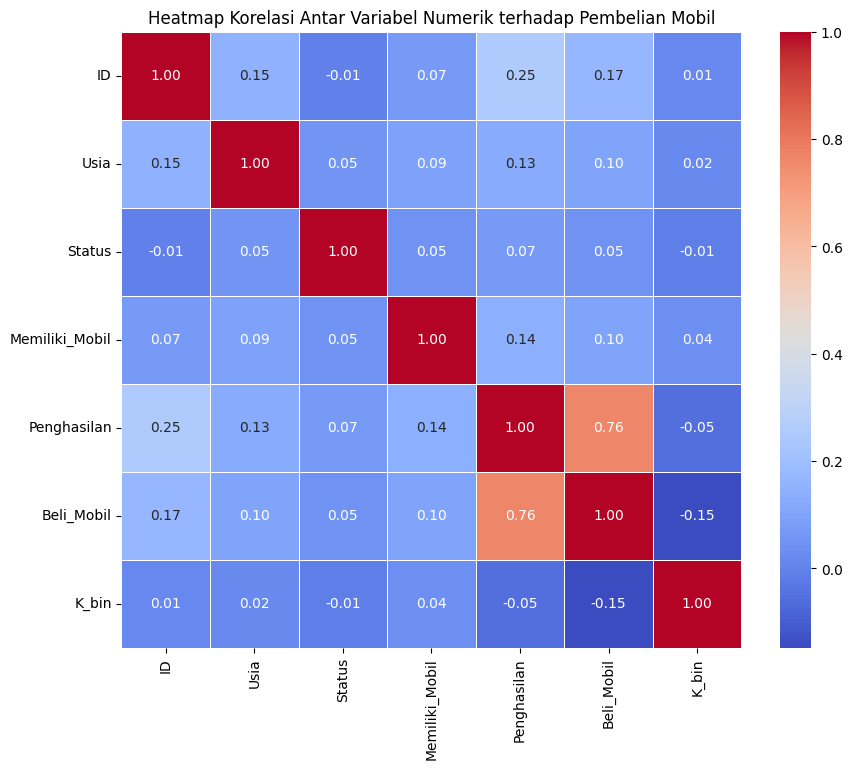

In [18]:
#Visualisasi heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap Korelasi Antar Variabel Numerik terhadap Pembelian Mobil')
plt.show()

In [21]:
#Fitur numerik dan gender
feature_num = ['Usia', 'Memiliki_Mobil', 'Penghasilan']
feature_bin = ['K_bin']

#Gabungkan dan drop missing (although based on previous checks there are no missing values)
use_cols = feature_num + feature_bin + ['Beli_Mobil']
df_model = df[use_cols].dropna().copy()

x = df_model[feature_num + feature_bin]
y = df_model['Beli_Mobil']

print ("X shape:", x.shape)
print ("y shape:", y.shape)

X shape: (1000, 4)
y shape: (1000,)


In [24]:
from re import X
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

print("Data latih:", X_train.shape)
print("Data uji:", X_test.shape)

Data latih: (800, 4)
Data uji: (200, 4)


In [26]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [27]:
#Scale hanya fitur numerik, gender langsung passthrough
preprocess = ColumnTransformer([
    ('num', StandardScaler(), feature_num),
    ('bin', 'passthrough', feature_bin)
],
remainder='drop')

model = LogisticRegression(max_iter=1000, solver='lbfgs', class_weight='balanced', random_state=42)

clf = Pipeline([('preprocess', preprocess), ('model', model)])

#Latih model
clf.fit(X_train, y_train)

print("calon pembeli mobil benar benar membeli mobil .")

calon pembeli mobil benar benar membeli mobil .


In [28]:
#Prediksi dan probabilitas
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]

#Hitung Metrik Evaluasi
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print (f"Akurasi: {accuracy_score(y_test, y_pred):4f}")
print (f"Presisi: {precision_score(y_test, y_pred, zero_division=0):4f}")
print (f"Recall: {recall_score(y_test, y_pred, zero_division=0):4f}")
print (f"F1 Score: {f1_score(y_test, y_pred, zero_division=0):4f}")
print (f"ROC AUC Score: {roc_auc_score(y_test, y_prob):4f}")

Akurasi: 0.930000
Presisi: 0.982906
Recall: 0.905512
F1 Score: 0.942623
ROC AUC Score: 0.976594


In [30]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

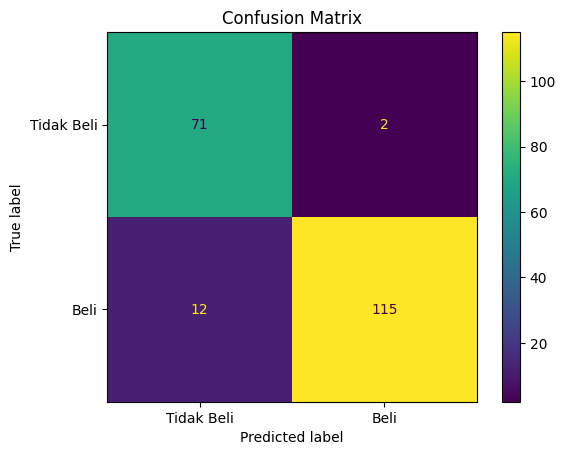

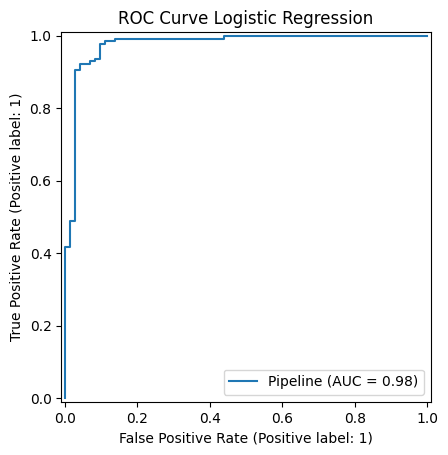

In [39]:
#Confusion Matrix
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=['Tidak Beli', 'Beli']).plot(values_format='d')
plt.title('Confusion Matrix')
plt.show()

#ROC Curve
RocCurveDisplay.from_estimator(clf, X_test, y_test)
plt.title("ROC Curve Logistic Regression")
plt.show()

In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=['Tidak Membeli Mobil (0)', 'Beli Mobil (1)']))

                         precision    recall  f1-score   support

Tidak Membeli Mobil (0)       0.86      0.97      0.91        73
         Beli Mobil (1)       0.98      0.91      0.94       127

               accuracy                           0.93       200
              macro avg       0.92      0.94      0.93       200
           weighted avg       0.94      0.93      0.93       200



In [34]:
import numpy as np

In [35]:
from sklearn.model_selection import cross_val_score

#Lakukan cross validation (cv=5 berarti 5-fold)
scores = cross_val_score(clf, x, y, cv=5)

#Tampilkan hasil
print("Skor tiap fold:", scores)
print("Rata-rata akurasi:", np.mean(scores))
print("Standar deviasi:", np.std(scores))

Skor tiap fold: [0.775 0.915 0.955 0.945 0.94 ]
Rata-rata akurasi: 0.9059999999999999
Standar deviasi: 0.06681317235396023


In [36]:
#Ambil nama fitur dan koefisien
feat_names = feature_num + feature_bin
feat_coef = clf.named_steps['model'].coef_[0]
odds = np.exp(feat_coef)

coef_df = pd.DataFrame({'Fitur': feat_names, 'Koefisien (log-odds)': feat_coef, 'Odds Ratio (e^coef)': odds}). sort_values('Odds Ratio (e^coef)', ascending=False)
display(coef_df)

,Fitur,Koefisien (log-odds),Odds Ratio (e^coef)
2,Penghasilan,4.523667,92.172995
1,Memiliki_Mobil,0.060514,1.062382
0,Usia,-0.048686,0.952480
3,K_bin,-1.141698,0.319276


In [38]:
#Contoh 2 pembeli
data_baru = pd.DataFrame({'Usia': [35, 50],
                          'Memiliki_Mobil': [1, 2], # 0=tidak, 1=satu, 2=dua atau lebih
                          'Penghasilan': [300, 500], # dalam jutaan
                          'K_bin': [1, 0] # 1 = laki-laki, 0= perempuan
                          })

pred = clf.predict(data_baru)
prob = clf.predict_proba(data_baru)[:, 1]

hasil = data_baru.copy()
hasil['Prob_Beli_Mobil'] = prob
hasil['Pred (0=Tidak,1=Ya)'] = pred
display(hasil)

,Usia,Memiliki_Mobil,Penghasilan,K_bin,Prob_Beli_Mobil,"Pred (0=Tidak,1=Ya)"
0,35,1,300,1,0.938533,1
1,50,2,500,0,0.999999,1


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Usia'].plot(kind='hist', bins=20, title='Usia')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Memiliki_Mobil'].plot(kind='hist', bins=20, title='Memiliki_Mobil')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Penghasilan'].plot(kind='hist', bins=20, title='Penghasilan')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='index', y='Usia', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Usia', y='Memiliki_Mobil', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Memiliki_Mobil', y='Penghasilan', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Penghasilan', y='K_bin', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['K_bin']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('K_bin')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Usia']
  ys = series['K_bin']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('Usia', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Usia')
_ = plt.ylabel('K_bin')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Usia']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Usia'}, axis=1)
              .sort_values('Usia', ascending=True))
  xs = counted['Usia']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('Usia', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Usia')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_12['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['Usia'].plot(kind='line', figsize=(8, 4), title='Usia')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['Memiliki_Mobil'].plot(kind='line', figsize=(8, 4), title='Memiliki_Mobil')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['Penghasilan'].plot(kind='line', figsize=(8, 4), title='Penghasilan')
plt.gca().spines[['top', 'right']].set_visible(False)